In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import os

In [21]:
def read_files(path):
    labels = []
    data = []
    for file in os.listdir(path):
        sub = file.split("_")[0]
        emb = np.load(path + file)
        
        labels.append(int(sub))
        data.append(emb)
    return labels, data


In [22]:
path = "face_embeddings/"

labels, data = read_files(path)

In [23]:
def emb_to_pandas(data, labels):
    df = pd.DataFrame(data)
    df["label"] = [int(l) for l in labels]
    return df

In [24]:
df = emb_to_pandas(data, labels)

In [25]:
df.to_csv("face_embeddings.csv", index=False)

### Testing quality

In [26]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def pca_clustering(embeddings, labels):
    # Convert embeddings and labels to numpy arrays
    embeddings = np.array(embeddings)
    labels = np.array(labels)

    # Perform PCA to reduce the dimensionality to 2D
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(embeddings)

    # Plot and color the data points according to the labels
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='tab20', alpha=0.7, edgecolor='k')
    plt.colorbar(scatter, label="Labels")
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('PCA Clustering Visualization')
    plt.show()


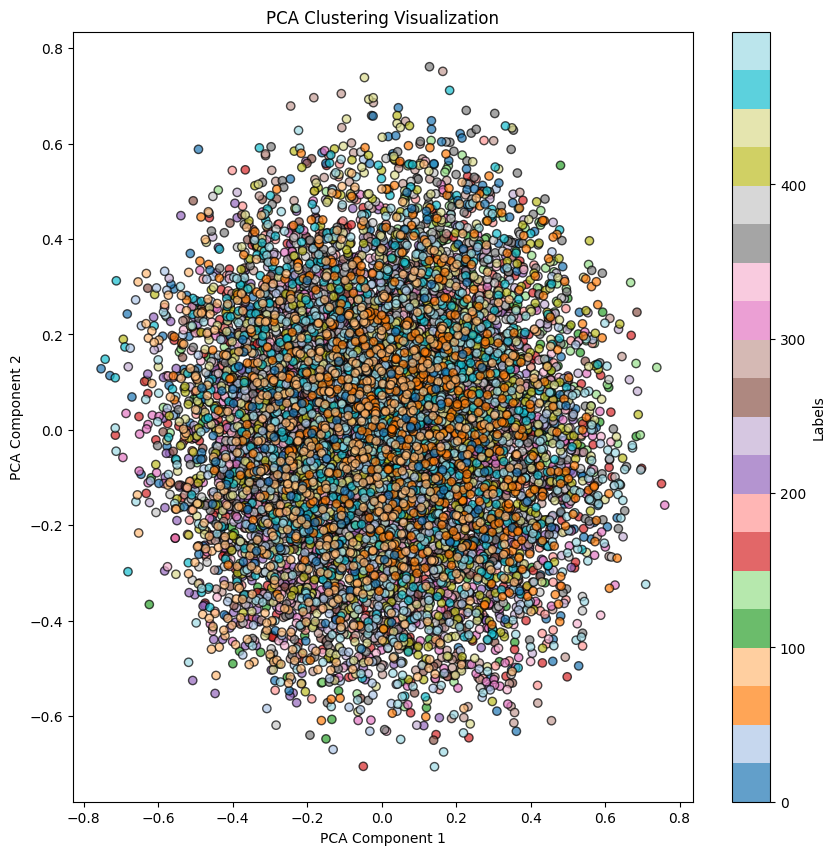

In [27]:
pca_clustering(data, labels)

In [30]:
df.shape

(11995, 513)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def random_forest(embeddings, labels):
    
    X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)
    
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    preds = rf.predict(X_test)

    print("Test accuracy: ", accuracy_score(y_test, preds), f1_score(y_test, preds, average="macro"))    
    
    return rf    
    
    
cutoff = int(len(data) * 0.8)
rf = random_forest(data[:cutoff], labels[:cutoff])

Test accuracy:  0.5505208333333333 0.48229456834101375
